#Identificar fronteras no lineales

In [76]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC

from sklearn.datasets.samples_generator import make_circles, make_blobs

In [77]:
X, Y = make_circles(100, factor = 0.1, noise = 0.1)

In [78]:
def plt_svc(model, ax = None, plot_support = True):
  '''Plot de la función de decisión para una clasificación en 2D con SVC'''
  if ax == None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  #Generamos la parrilla de puntos para evaluar el modelo
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(yy, xx) #Ojo que se definen al revés

  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  #Representamos las fronteras y los márgenes del SVC
  ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])

  if plot_support:
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, linewidth = 1, facecolors = 'black')
  
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

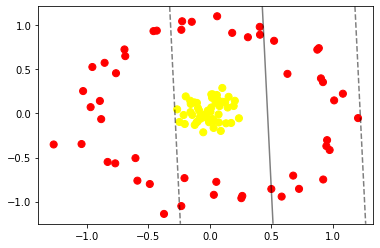

In [79]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = 'autumn')
plt_svc(SVC(kernel = 'linear').fit(X,Y), plot_support = False)

In [80]:
r = np.exp(-(X**2).sum(1)) #Es algo como obtener una campana gaussiana de los valores y normalizarlos
r

array([0.9940218 , 0.9985654 , 0.27667227, 0.39586553, 0.33326836,
       0.35533653, 0.17698968, 0.98690116, 0.94294939, 0.96841155,
       0.97213335, 0.99183332, 0.38655548, 0.96532442, 0.93240505,
       0.36595757, 0.95519191, 0.55990813, 0.35253204, 0.32605539,
       0.99538184, 0.99824037, 0.29217083, 0.99474382, 0.54622884,
       0.2378398 , 0.37858065, 0.38677151, 0.53744555, 0.94588976,
       0.9540015 , 0.97873993, 0.95351205, 0.95619669, 0.40971738,
       0.36782984, 0.96933411, 0.91073473, 0.32415332, 0.38873648,
       0.45499562, 0.95458125, 0.95887812, 0.99165507, 0.97542203,
       0.9683363 , 0.2639315 , 0.39008846, 0.98402535, 0.44202761,
       0.9703132 , 0.99535228, 0.99644499, 0.99876394, 0.9399151 ,
       0.42078437, 0.99962625, 0.97244252, 0.29964378, 0.41575139,
       0.99127243, 0.29540119, 0.98988765, 0.94246613, 0.40251958,
       0.29649631, 0.97309975, 0.45745011, 0.38422194, 0.97556583,
       0.95564132, 0.34013307, 0.93029517, 0.24397031, 0.28432

In [81]:
from mpl_toolkits import mplot3d

In [82]:
def plot_3D(elev = 30, azim = 30, X = X, Y = Y, Z = r):
  ax  = plt.subplot(projection = '3d')
  ax.scatter3D(X[:,0], X[:,1], Z, c = Y, s = 50, cmap = 'autumn')
  ax.view_init(elev = elev, azim = azim)

  ax.set_xlabel('X[0]')
  ax.set_ylabel('X[1]')
  ax.set_zlabel('Z')

In [83]:
from ipywidgets import interact, fixed
interact(plot_3D, elev = [-90, -60, -30, 0, 30, 60, 90], azim = [-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], X = fixed(X), Y = fixed(Y), Z = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D>

In [84]:
#Probamos ahora con un kernel no lineal, pero rbf es radial
rbf = SVC(kernel = 'rbf', C = 1E6)
rbf.fit(X, Y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

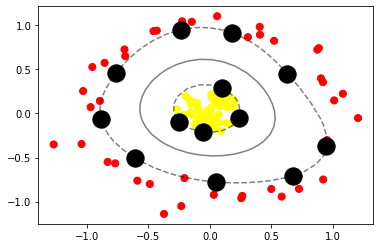

In [85]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = 'autumn')
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:, 0], rbf.support_vectors_[:, 1], s = 300, lw = 1, facecolors = 'none')

# Ajustar los parámetros de SVM

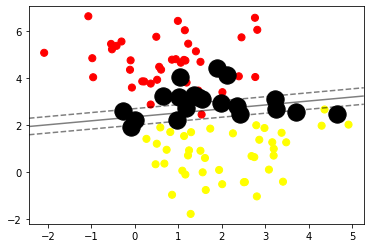

In [86]:
X, Y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.2)
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = 'autumn')
model = SVC(kernel = 'linear', C = 1E6)
model.fit(X,Y)
plt_svc(model)
#Como los valores se solapan en la frontera y la C es muy alta (poco laxa), a parte de tardar horrores...lo hace fatal. Así que hay que buscar un equilibrio para poder estimar un valor de C adecuado
#Habrá que hacer validación cruzada

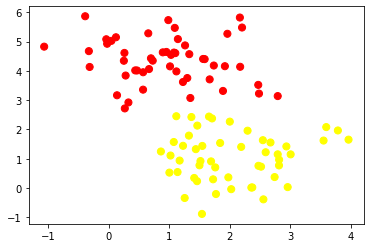

In [87]:
# En SVC, para una C muy alta lo que ocurre es que no se permite que ningún punto del otro conjunto caiga dentro del corredor, pero bajando ese valor se puede flexibilizar
X, Y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8) #Bajamos un poquito la std para que se vea mejor
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = 'autumn')

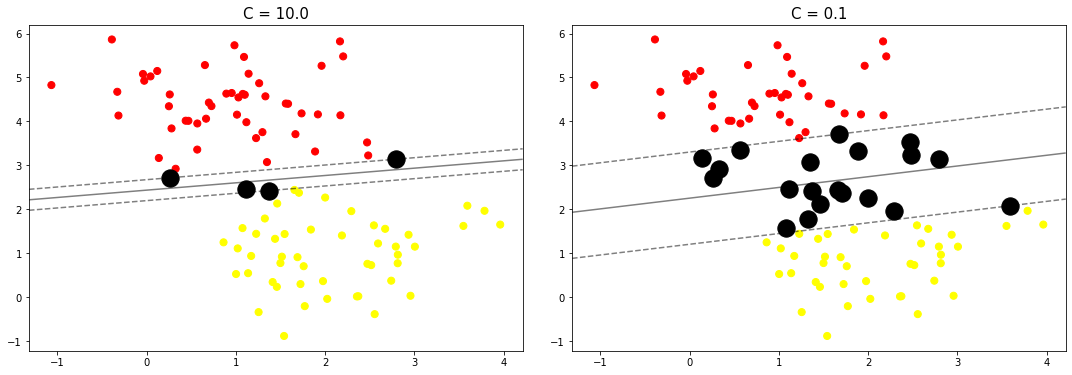

In [88]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace = 0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
  model = SVC(kernel = 'linear', C = C)
  model.fit(X, Y)
  ax_i.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = 'autumn')
  plt_svc(model, ax_i)
  ax_i.set_title('C = {0:.1f}'.format(C), size = 15)